# Índice

1. [Introdução](#intro)
2. [Enquadramento Teórico](#enquad)
3. [Binariazção](#binar)
4. [Melhoramento da Imagem](#melhor)
5. [Extração de componentes complexos e de propriedades](#extrac)
6. [Resultados + Aplicação](#resul)
7. [Conclusões](#conclusao)
8. [Referências](#refs)


<a id="intro"></a>

#### 1. Introdução

Este projeto tem como objetivo o desenvolvimento de um algortimo com a capacidade de contar automaticamente o número de peças de Lego retangulares.
Este algoritmo de visão por computador está familiarizado com a biblioteca de funções OpenCV (Open Source Computer Vision).

O processo de cassificação de objetos numa imagem consiste em várias etapas:
* **Binarização** - Conversão da imagem original em imagem binátria.
* **Operadores Morfológicos** - Aplicação de operações como dilatação, erosão, abertura ou fecho na imagem binária com o objetivo de melhorar a definição dos objetos.
* **Etiquetagem** - Identificação individual de cada objeto para facilitar a análise.
* **Extração de Características** - Extração de características como forma, tamanho, etc.
* **Classificação** - O vetor de características é usado como entrada para um classificador que atribui uma classe para cada objeto.

<img src="esquema.png" width=30% style="display: block; margin: auto;">

<a id="enquad"></a>

#### 2. Enquadramento Teórico

Uma imagem pode ser definida como uma função *f(x,y)* onde *x* e *y* são coordenadas espaciais e *f* a intensidade ou cor desse ponto.
Se *f*, *x* e *y* são valores discretos e finitos, a imagem é digital.<br>

**Processamento Digital de Imagens** (PDI) = processar uma imagem digital a partir de um computador digital.<br>
Por outras palavras, o processamento digital de imagens consiste num conjunto de algoritmos que visa o melhoramento da imagem ou a extração de informações.
Pode ser resumido nos seguintes passos:

* **Aquisição de imagem** - captura de uma imagem com a utilização de uma câmara.
* **Melhoramento da imagem** - melhorar a qualidade visual de uma imagem, como por exemplo, ao aumentar o contraste e reduzir o ruídos.
* **Restauração de imagem** - remoção da degradação de uma imagem, como desfocagem, ruído e distorção.
* **Segmentação da imagem** - divisão de uma imagem em regiões ou segmentos, cada um dos quais corresponde a um objeto ou característica específica da imagem.
* **Representação e descrição da imagem** - representação e análise de uma imagem de forma a descrever as suas características.
* **Análise de imagem** - utilização de algoritmos e modelos matemáticos para extrair informação de uma imagem (reconhecimento de objetos, deteção de padrões, etc.).
* **Síntese e compressão da imagem** - geração de uma nova imagem ou a compressão de imagens existentes para reduzir os requisitos de armazenamento e transmissão.

<img src="img acquisition.png" width=40% style="display: block; margin: auto;">



O processamento digital de imagens é utilizado numa variedade de aplicações, incluindo **imagens médicas**, **deteção remota**, **visão por computador** e **multimédia**.

Este processamento pode ser de:
* nível baixo - Redução de ruído; realçamento de imagens; itensificação de características.
* nível médio - Segmentação; descrição de regiões ou objetos; classificação.
* nível alto - Interpretação da cena.


Uma imagem pode entretanto ser definida como:
* monocromática (tons cinzentos), *I[r,c]*, a cada pixel é asscociado um valor escalar (intensidade).
* multiespectral, *M[r,c]*, a cada pixel é associado um vetor de dimensão N, onde N representa o número de canais de cor.
* binária, *B[r,c]*, a cada pixel é associado apenas os valores 0 ou 1.
* de classes (labels), *L[r,c]*, a cada pixel é associado um dado símbolo, escolhido de entre os símbolos de um alfabeto finito

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

<a id="binar"></a>

#### 3. Binarização

A **binarização** de uma imagem refere-se a uma quantização em que a precisão é reduzida a 1 bit. Consiste num processo de conversão de uma imagem em tons de cinzentos para uma imagem binária. Ou seja, onde cada pixel tem apenas dois valores possíveis,** preto(0)** ou **branco(255)**, facilitando a análise de objetos na imagem.

In [2]:
def binarization(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hue_channel = hsv[:, :, 0]
    hist_hue = cv2.calcHist([hue_channel], [0], None, [180], [0, 180])

    max_hue = np.argmax(hist_hue)

    lower_limit = np.array([max_hue - 10, 50, 50])
    upper_limit = np.array([max_hue + 10, 255, 255])
    
    mask = cv2.inRange(hsv, lower_limit, upper_limit)

    mask_inv = cv2.bitwise_not(mask)
    mask_inv2 = cv2.bitwise_and(img, img, mask=mask_inv)

    gray = cv2.cvtColor(mask_inv2, cv2.COLOR_BGR2GRAY)        

    thres, binary_result = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)

    return binary_result

Para o processo de binarização, isolamos as peças do fundo com base na **tonalidade (Hue)**.
Primeiramente, converte-se a imagem de formato BGR(azul, verde, vermelho) para HSV(Hue, Saturação, Valor). Desta forma, extrai-se o canal hue com as informações de tonalidade.<br></br>
Sabendo que o canal Hue varia de 0 a 179, é calculado um histograma que auxiliará a vizualizar a **distribuição da cor pela imagem**. Desta forma, podemos verificar o valor mais frequente e identificar a cor correspondente ao **fundo**.<br></br>
A seguir, define-se um intervalo de cores em torno do valor Hue predominante. Com uma **margem de ±10** captura-se a variação suave da cor do fundo. Quanto aos valores de **saturação**(50) e **brilho**(255) são defnidos para isolar adequadamente as cores mais saturadas e iluminadas, descartando os pixeis mais escuros e capturando qualquer nível de saturação.<br></br>
O próximo passo é a **geração de máscara binária** que definirá os pixeis como brancos ou pretos. Esta máscara é depois **invertida para isolar as peças** e destacá-las.
Com a função **cv2.bitwise_not()** são mantido os pixeis correspondentes às peças e é **descartado o fundo**.<br></br>
Converte-se o resultado para **escala de cinza** para facilitar a binarização e aplica-se **thresholding** para criar uma imagem binária das peças.

<a class="anchor" id="melhor"></a>
#### 4. Melhoramento da Imagem

Chama-se de **operadores morfológicos** as técnicas de manipulação de formas e estruturas de uma imagem binária, aplicando operações com base em um elemento (kernel).<br>
Neste trabalho prático foram utilizados dois operadores morfológicos: erosão e dilatação.<br></br>
A **erosão** de uma imagem binária consiste no desgastamento das bordas das áreas brancas da imagem binária.<br>
O valor do pixel de saída é o valor mínimo de todos os pixeis na vizinhança do pixel de entrada. É atribuído ovalor máximo (1 ou 255) aos pixeis exteriores.<br></br>
A **dilatação** de uma imagem binária consiste na expansão das áreas brancas.<br>
O valor do pixel de saída é o valor máximo de todos os pixeis na vizinhança do pixel de entrada. É atribuído o valor mínimo (0) aos pixeis exteriores.


In [3]:
def otimization(binary_img):
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
    eroded = cv2.erode(binary_img, kernel, iterations=5)
    dilated = cv2.dilate(eroded, kernel, iterations=2)
    final_binary_img = cv2.morphologyEx(dilated, cv2.MORPH_OPEN, kernel)

    return final_binary_img

Para melhorar a imagem, utiliza-se a função cv2.getStructuringElement() para **melhorar a segmentação** através da remoção de ruído e do preenchimento de pequenos buracos. Aplica-se a **erosão** de forma a separar peças juntas. Com a **dilatação**, restaura-se o tamanho original das peças e com cv2.morphologyEx() aplica-se um **fecho morfológico** para preencher pequenos buracos.

<a class="anchor" id="extrac"></a>

#### 5. Extração de componentes complexos e de propriedades

A extração de componentes complexos e de propriedades é um processo de identificação e análise de diferentes objetos numa imagem, permitindo o estudo de características específicas de cada região.

In [4]:
def drawContours(retangulo, img):
    box = cv2.boxPoints(retangulo)
    box2 = np.int64(box)
    cv2.drawContours(img, [box2], 0, (0, 0, 255), 2)

In [5]:
def contour(final_binary_img, img):
    piece2x2=0
    piece2x4=0
    piece2x6=0
    piece2x8=0

    contours, _ = cv2.findContours(final_binary_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for contour in contours:
        area = cv2.contourArea(contour)
            
        rectangle = cv2.minAreaRect (contour)
        width, height = rectangle[1]
        
        area_rectangle = width * height
        
        rect = cv2.minAreaRect(contour)
        (x, y), (w, h), angle = rect
        
        if area_rectangle > 0:
            relative_diff = abs(area - area_rectangle) / area_rectangle  

            if relative_diff < 0.16:
                
                upper_limit = h + 10
                lower_limit = h - 10
                
                isSquare = w < upper_limit and w > lower_limit
                validPiece = w > 50 and h > 50

                if isSquare and validPiece :
                    drawContours(rectangle, img)
                    cv2.putText(img, "2 x 2", (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 0), 2)
                    piece2x2+=1

                elif validPiece :
                    if w > 310 or h > 310:
                        drawContours(rectangle, img)
                        cv2.putText(img, "2 x 8", (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 0), 2)
                        piece2x8+=1

                    elif w >250 or h > 250:
                        drawContours(rectangle, img)
                        cv2.putText(img, "2 x 6", (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 0), 2)
                        piece2x6+=1

                    elif w >150 or h > 150:
                        drawContours(rectangle, img)
                        cv2.putText(img, "2 x 4", (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 0), 2)
                        piece2x4+=1
                    
                    else:
                        drawContours(rectangle, img)
                        cv2.putText(img, "Peca invalida", (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 0), 2)
                else:
                    drawContours(rectangle, img)
                    cv2.putText(img, "Peca invalida", (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 0), 2)
            
            else:
                drawContours(rectangle, img)
                cv2.putText(img, "Peca invalida", (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 0), 2)

    cv2.putText(img, f'2x2: {piece2x2}',(10, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 0), 2)
    cv2.putText(img, f'2x4: {piece2x4}',(10, 40), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 0), 2)
    cv2.putText(img, f'2x6: {piece2x6}',(10, 60), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 0), 2)
    cv2.putText(img, f'2x8: {piece2x8}',(10, 80), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 0), 2)

    final_result = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return final_result

Na **extração de elementos complexos e de propriedades**, recorre-se à função cv2.findContours() que encontra os **contornos** na imagem recebida no primeiro parâmetro e onde cv2.RETR_EXTERNAL obtém contornos externos e cv2.CHAIN_APPROX_SIMPLE simplifica os contornos.

Para então contar e classificar as peças Lego, percorreu-se cada contorno encontrado e para cada:
* Calcula-se a área.
* Define-se um retângulo em redor do contorno.
* Calcula-se a área do retângulo e obttem-se as suas dimensões e centro.<br></br>
Se a área do retângulo for positiva:<br>
* Compara-se a área do contorno com a área do retângulo.
* Se a diferença relativa for pequena o suficiente (o objeto é considerado um retângulo), classifica-se as peças de acordo com as dimensões do retêngulo.

<a class="anchor" id="resul"></a>

##### 6. Resultados + Aplicação

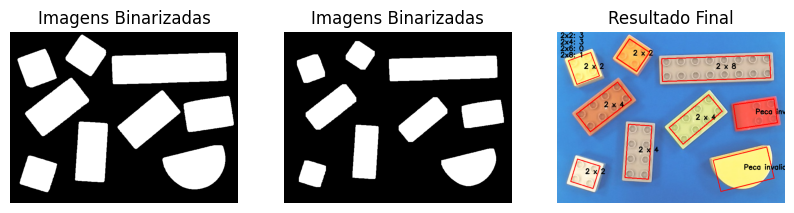

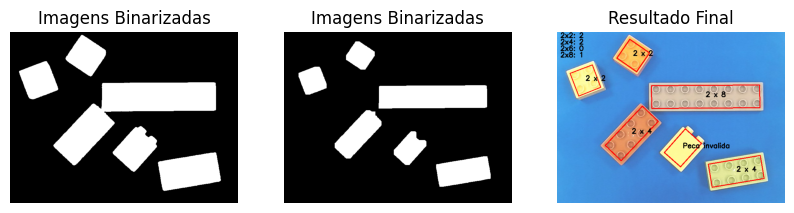

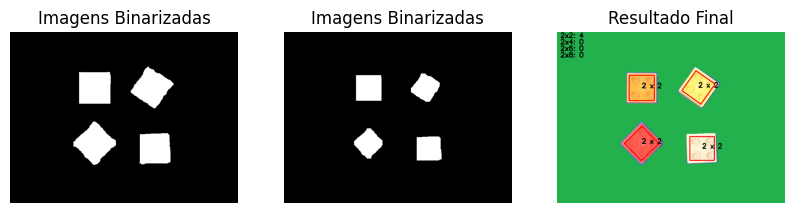

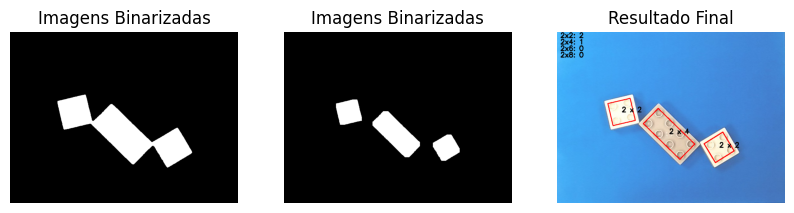

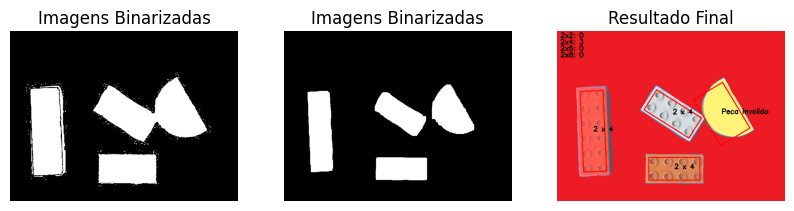

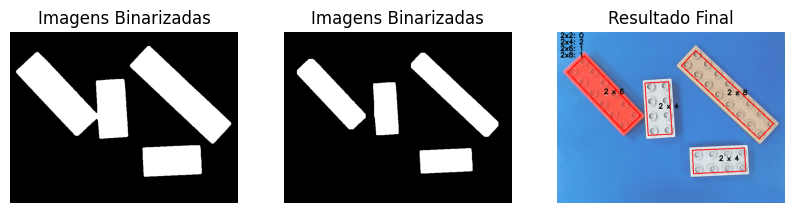

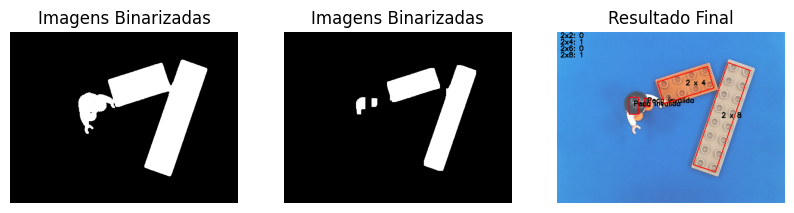

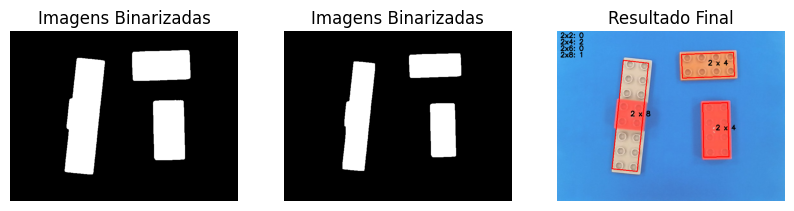

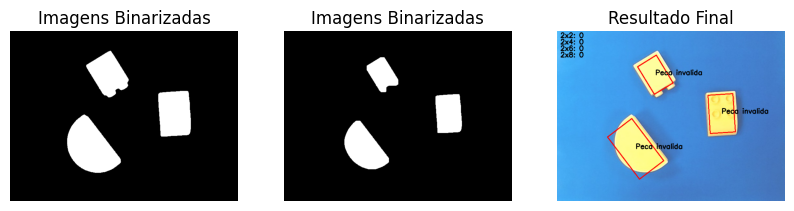

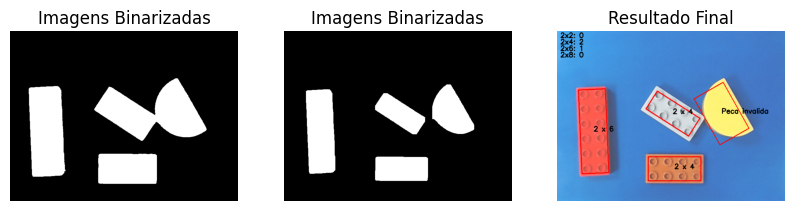

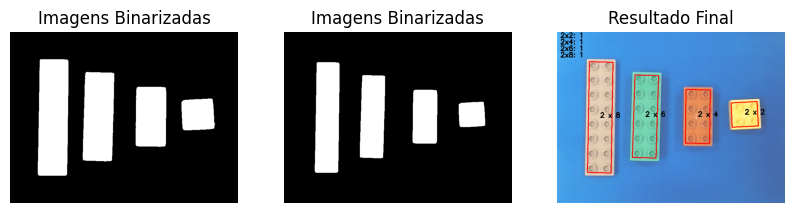

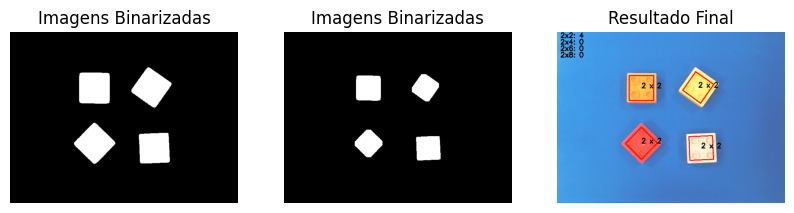

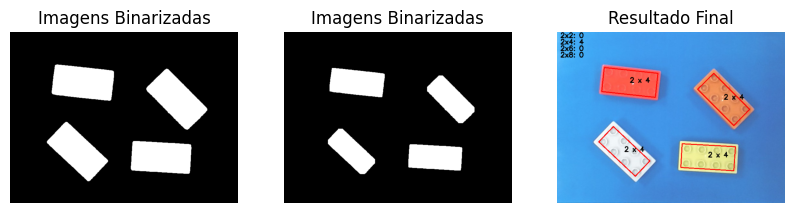

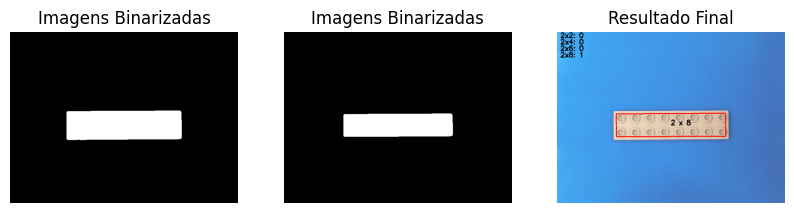

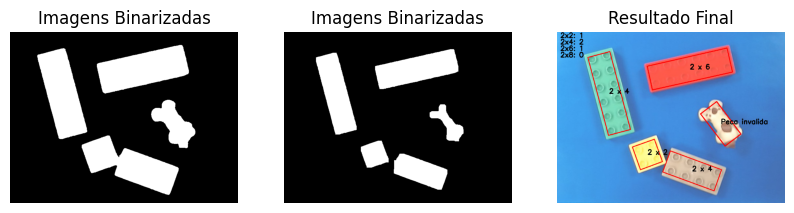

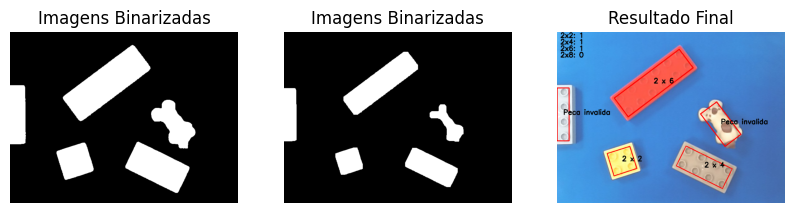

In [6]:
# img = cv2.imread('treino/lego13.jpg') # Resultado com apenas uma imagem
# imagens = [img]                       # Resultado com apenas uma imagem
folder = 'treino'                       # Resultado de todas as imagens
images = os.listdir(folder)             # Resultado de todas as imagens

for image in images:
    path = os.path.join(folder, image)  # Resultado de todas as imagens
    img = cv2.imread(path)              # Resultado de todas as imagens

    if img is not None:
        binary_img=binarization(img)
        final_binary_img=otimization(binary_img)
        result = contour(final_binary_img,img)

        plt.figure(figsize=(10, 10))

        plt.subplot(131)
        plt.imshow(binary_img, cmap='gray')
        plt.title("Imagens Binarizadas")
        plt.axis('off')

        plt.subplot(132)
        plt.imshow(final_binary_img, cmap='gray')
        plt.title("Imagens Binarizadas")
        plt.axis('off')

        plt.subplot(133)
        plt.imshow(result, cmap='gray')
        plt.title("Resultado Final")
        plt.axis('off')
        plt.show()

<a class="anchor" id="conclusao"></a>

#### 7. Conclusão

Neste primeiro trabalho prático, foi desenvolvido um algoritmo de contagem e classificação automática de peças retangulares Lego.
Após a realização do trabalho, o sistema foi capaz de processar as imagens e identificar as diferentes dimensões das peças de forma eficiente.

Ainda para o caso de uma peça sobre uma outra, tentou-se implementar um [algoritmo](#algoritmoExtra) que distinguia as peças pelas diferente cores, mas sem sucesso.

Entretanto, com este trabalho, foi possível compreender os desafios envolvidos no processamento e análise de imagens e aprimorar as habilidades práticas relativas à computação.

<a id="algoritmoExtra"></a>

In [7]:
def get_piece_color(contour, img):
    mask = np.zeros(img.shape[:2], dtype="uint8")
    cv2.drawContours(mask, [contour], -1, 255, -1)  
    mean_color = cv2.mean(img, mask=mask)

    return mean_color[:3]

    '''Cria-se uma máscara vazia do mesmo tamanho da imagem e desenha-se
    o contorno na mesma. É então calculada a média da cor dentro da área
    do contorno e esta é retornada em BGR.'''

<a id="refs"></a>

#### 8. Referências

* <a href="https://docs.opencv.org/4.x/d7/dbd/group__imgproc.html" target="_blank">OpenCV: Image Processing</a>
* <a href="https://www.geeksforgeeks.org/digital-image-processing-basics/" target="_blank">Digital Image Processing Basics - GeeksForGeeks</a>
* <a href="https://2425moodle.isel.pt/course/view.php?id=8502" target="_blank">Acetatos de Processamento de Imagem e Visão, Moodle ISEL</a>
*  C. Gonzalez, Rafael; E. Woods, Richard. Digital Image Processing. 3ª edição